In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv('pbjam/data/prior_data.csv')
df = df[:10]
kics = [n for n in df.KIC]
cadence = ['long' for n in df.KIC]

numaxs = [[n, err] for n, err in zip(df.numax, df.numax_err)]
dnus = [[n, err] for n, err in zip(df.dnu, df.dnu_err)]
teffs = [[n, err] for n, err in zip(df.Teff, df.Teff_err)]
bp_rps = [[n, 0.1] for n in df.bp_rp]


In [3]:
# Initialize a jam session with a list of stars:
jam_sess = session(ID = kics, numax = numaxs, dnu = dnus, teff = teffs, bp_rp = bp_rps, nthreads=1, use_cached=True)

In [4]:
for star in tqdm(jam_sess.stars):
    star.asymptotic_modeid(norders = 9)

  0%|          | 0/10 [00:00<?, ?it/s]

Burningham
Sampling


 10%|█         | 1/10 [01:36<14:26, 96.32s/it]

Burningham
Sampling


 20%|██        | 2/10 [02:41<11:35, 86.93s/it]

Burningham
Sampling


 30%|███       | 3/10 [04:21<10:37, 91.02s/it]

Burningham
Sampling


 40%|████      | 4/10 [05:57<09:15, 92.51s/it]

Burningham
Sampling


 50%|█████     | 5/10 [07:35<07:49, 93.97s/it]

Burningham
Sampling


 60%|██████    | 6/10 [09:24<06:33, 98.47s/it]

Burningham
Sampling


 70%|███████   | 7/10 [10:55<04:49, 96.34s/it]

Burningham
Sampling


 80%|████████  | 8/10 [12:35<03:14, 97.34s/it]

Burningham
Sampling


 90%|█████████ | 9/10 [14:45<01:47, 107.07s/it]

Burningham
Sampling


100%|██████████| 10/10 [16:14<00:00, 101.89s/it]


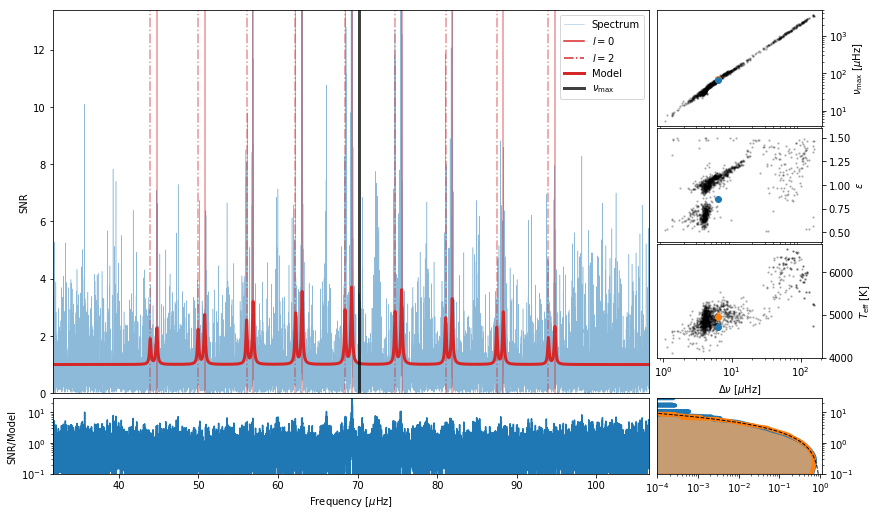

In [12]:
idx = 3
fig = jam_sess.stars[idx].plot_asyfit()

In [6]:
star = jam_sess.stars[idx]

In [7]:
star.asy_result.summary

,numax,dnu,eps,alpha,d02,env_height,env_width,mode_width,teff,bp_rp
best,94.481858,7.449142,1.018922,0.008305,0.844690,2.656652,26.172423,-0.515078,5096.758149,1.243585
mean,93.778518,7.452046,1.033486,0.008991,0.851370,2.544150,28.240732,-0.535392,5025.074241,1.222360
std,1.121781,0.022057,0.023523,0.001423,0.088066,0.164881,4.062471,0.061546,127.092975,0.085366
skew,-0.907141,1.052830,1.224966,1.521101,5.374763,-2.123076,1.905540,-1.527050,-0.209100,-0.491688
2nd,89.632324,7.400271,0.975797,0.006484,0.750137,1.899767,26.063625,-0.699239,4718.625267,0.926338
16th,89.795264,7.408055,0.985520,0.006788,0.763298,1.902524,26.064664,-0.693605,4719.579103,0.930323
50th,90.157788,7.411964,0.989387,0.007072,0.773148,1.909638,26.067034,-0.688321,4723.184944,0.933488
84th,90.445537,7.414274,0.991869,0.007188,0.778153,1.911042,26.068695,-0.685348,4725.509476,0.939719
97th,90.502104,7.415182,0.992448,0.007217,0.779346,1.911865,26.068925,-0.683673,4725.772874,0.956039


In [8]:
star.asy_result.modeID

,ell,nu_mu,nu_std
0,2,59.583954,0.309518
1,0,60.413104,0.364628
2,2,66.771687,0.286396
3,0,67.600791,0.343221
4,2,74.023185,0.274028
5,0,74.851801,0.332128
6,2,81.338580,0.272029
7,0,82.166578,0.330866
8,2,88.717019,0.280076
9,0,89.544380,0.339092


In [9]:
import pickle
pickle.dump(star, open("%s.p" % (star.ID), "wb"))